### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [10]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [12]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

## Contents
Section 1: Data Cleanup
Section 2: Data Exploration
Section 3: Data Visualization

# Section 1: Data Cleanup

In [9]:
#Check for Null Values, there are none
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [25]:
#By inspection, I will focus on the following columns
#Remove excess ' (single quotes)
df["checking_status"] = df["checking_status"].str.replace("\'", "")
df["savings_status"] = df["savings_status"].str.replace("\'", "")
df["employment"] = df["employment"].str.replace("\'", "")
df["credit_history"] = df["credit_history"].str.replace("\'", "")
df["personal_status"] = df["personal_status"].str.replace("\'", "")
df


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,delayed previously,'new car',4870,<100,1<=X<4,3,male single,none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,existing paid,'used car',3857,<100,1<=X<4,4,male div/sep,none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [24]:
#Check df for the column data types, no need to make any changes
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [ ]:
#At this point, the data is as clean as I need it to be

# Section 2: Data Exploration

In [36]:
#Make a subset of the data for using the sns.pairplot() function
number_data = df[["duration","credit_amount","credit_amount","installment_commitment","age","num_dependents"]]
number_data.dtypes

duration                  int64
credit_amount             int64
credit_amount             int64
installment_commitment    int64
age                       int64
num_dependents            int64
dtype: object

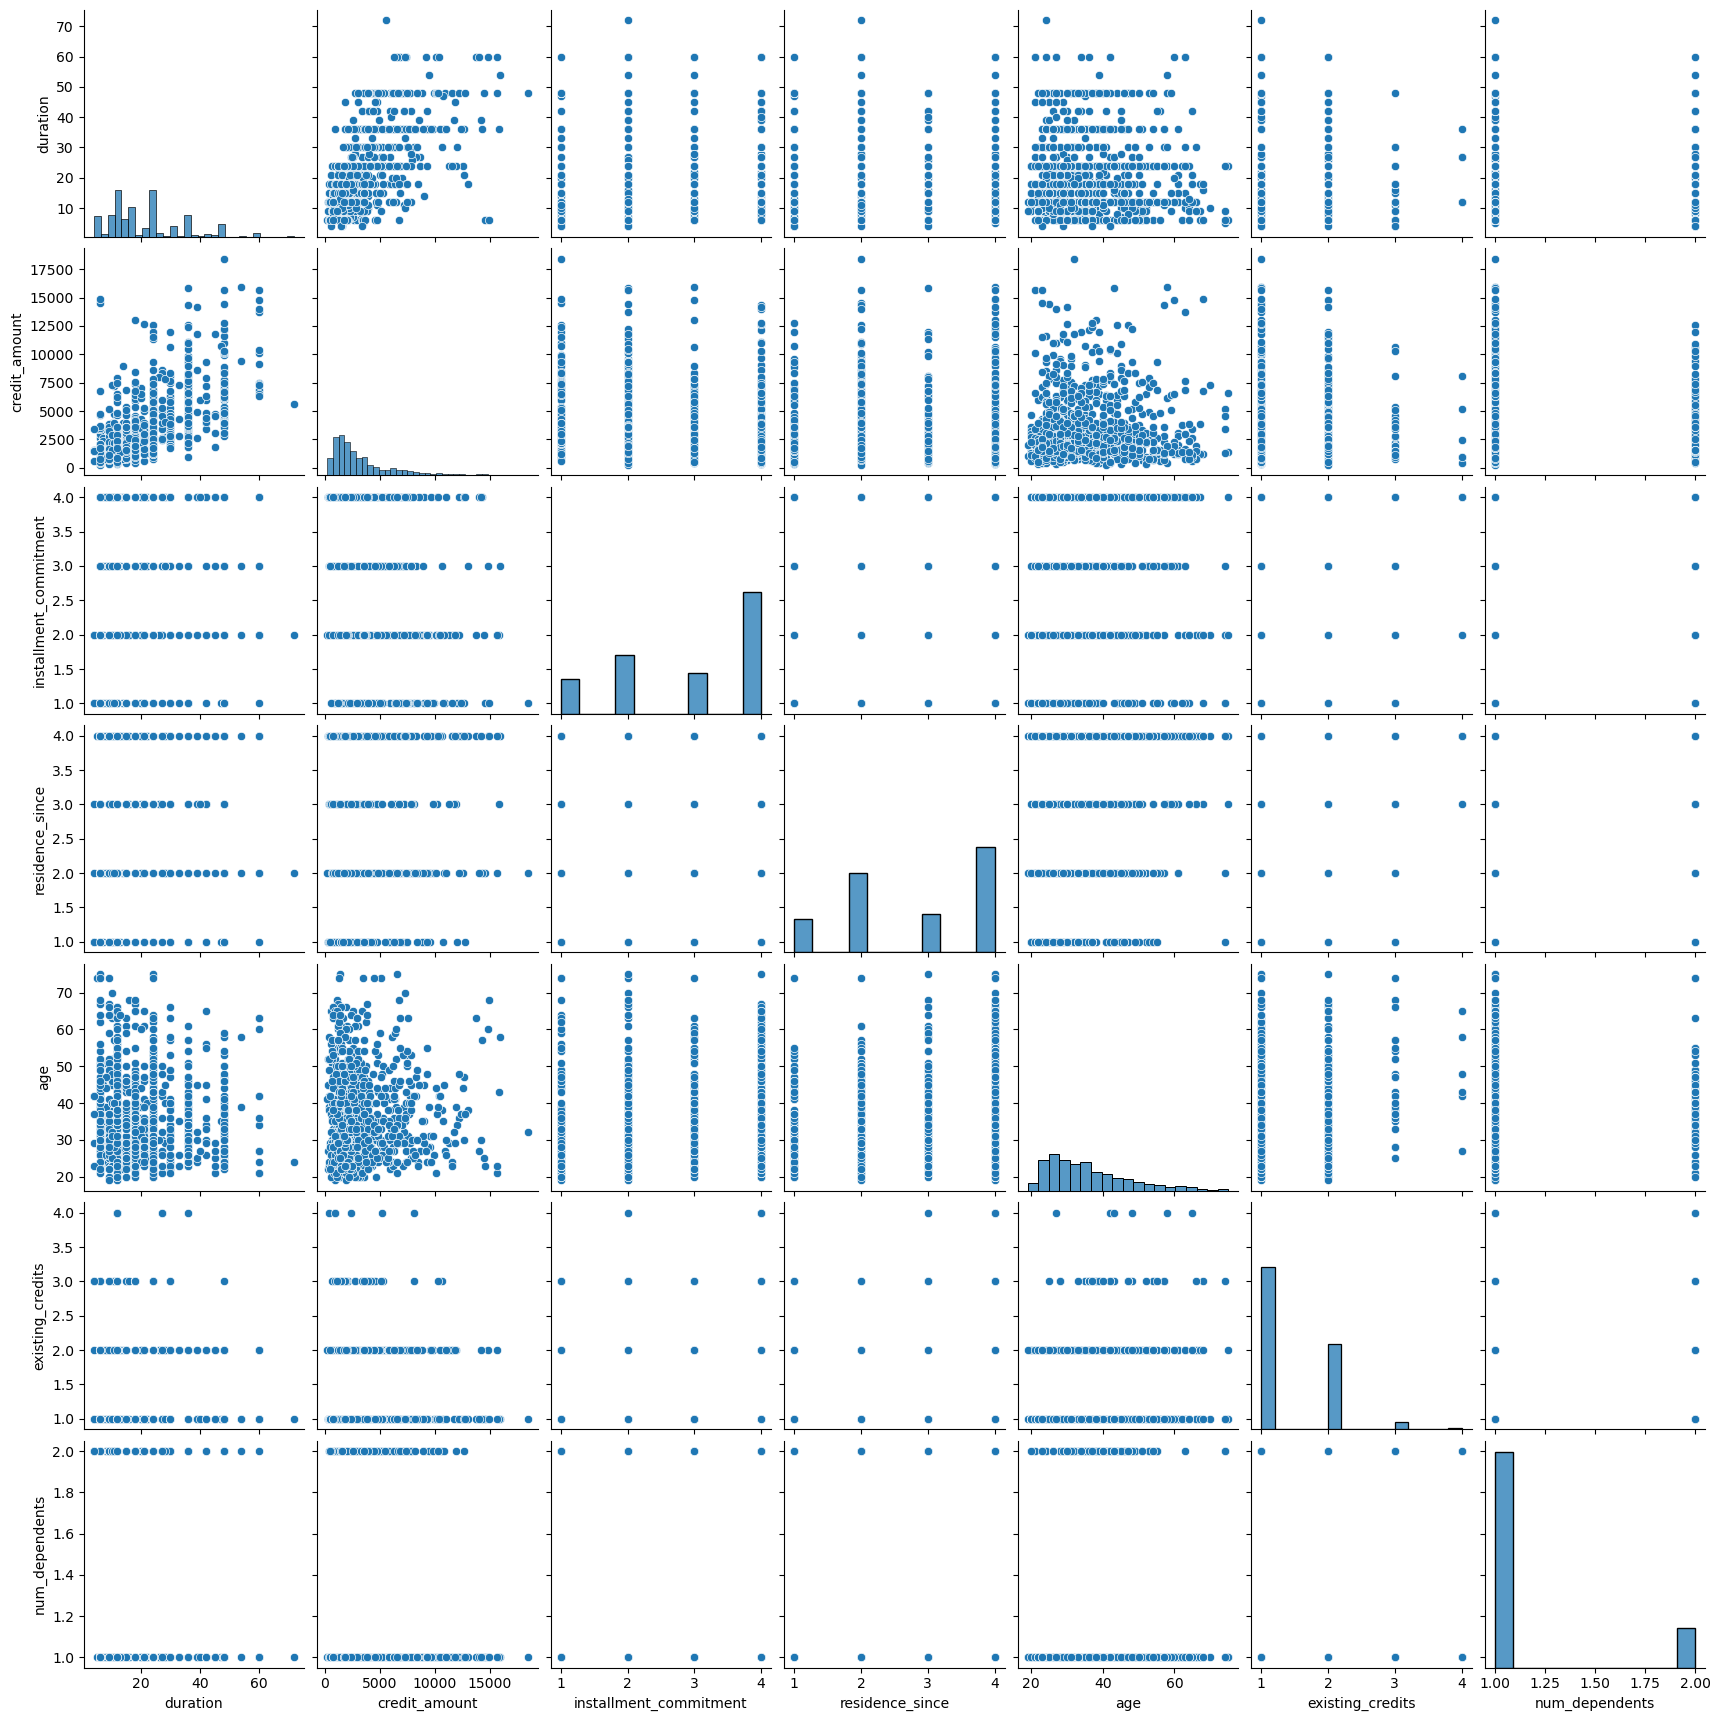

In [38]:
#Use pairplot to identify variables that have correlation
sns.pairplot(df)

# Section 3: Data Visualization

In [108]:
#there appears to be a relationship betwee the following pairs of data:
# amount vs duration
# existing_credits vs duration
# existing_credits vs amount
# age vs amount


# let's do some plots, using the good/bad credit as the color attribute when possible
px.scatter(df, x="credit_amount", y="age", color="class")


## age vs credit_amount

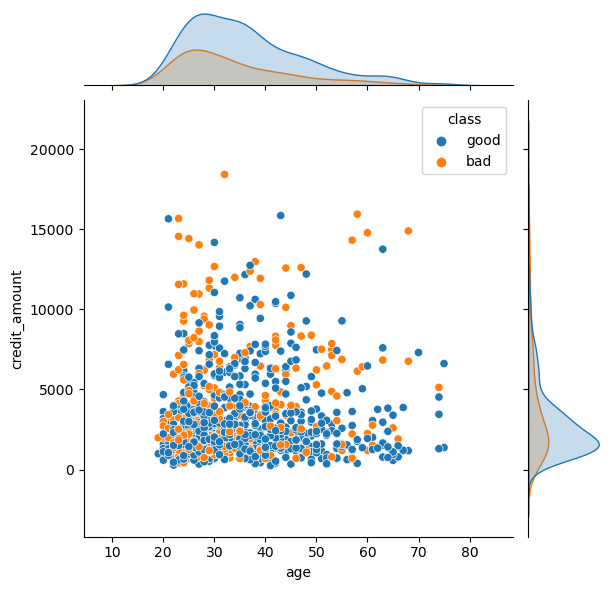

In [85]:
sns.jointplot(df, x="age", y="credit_amount", hue="class")#, kind="hex")

In [84]:
px.histogram(df, x="age",y="credit_amount",color="class")

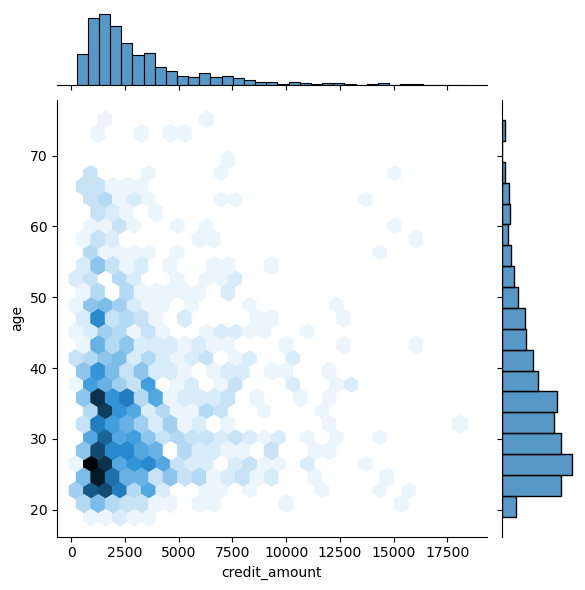

In [90]:
sns.jointplot(df, x="credit_amount", y="age", kind="hex")

## duration vs credit_amount

In [88]:
px.histogram(df, x="credit_amount",y="duration",color="class")

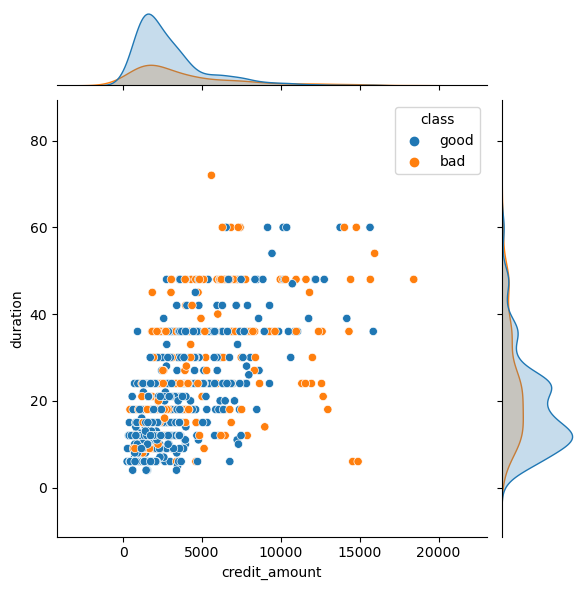

In [89]:
sns.jointplot(df, x="credit_amount", y="duration", hue="class")#, kind="hex")

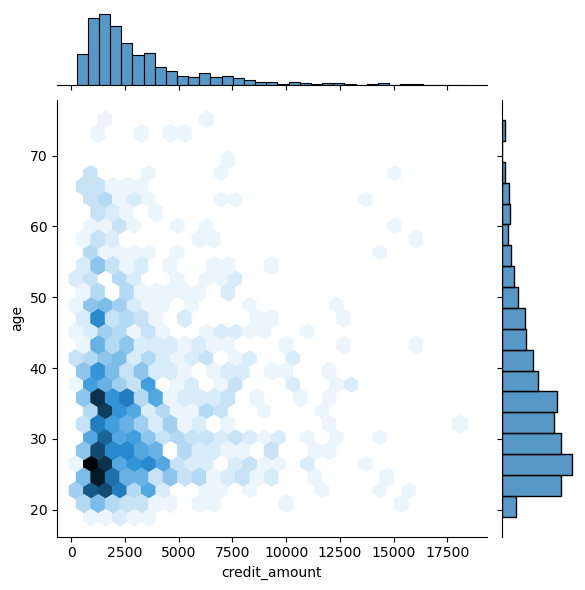

In [92]:
sns.jointplot(df, x="credit_amount", y="age", kind="hex")

## Existing Credits vs Credit Amount and Duration

In [68]:
px.box(df,x="existing_credits",y="credit_amount",color="class")


In [50]:
px.box(df,x="existing_credits",y="duration",color="class")


## Existing Credits vs Credit Amount and Duration

In [102]:
# installment_commitment vs Credit Amount and Duration
px.box(df,x="installment_commitment",y="credit_amount",color="class")


In [103]:
px.box(df,x="installment_commitment",y="duration",color="class")


# Comments
Scatter and joint plots did not show obvious patterns. Histograms with class as the color were an improvement and it begins to seem like lower credit amounts are associated with a higher proportion of bad credit ratings. Box plots did an even better job of highlighting this trend. Existing Credits and Installment Commitment emerged as somewhat reliable predictors of credit rating, especially when plotted against Duration and Credit Amount.

Overall, however, these data are not providing a strong basis for making predictions for whether a new applicant will be classed as either Good or Bad. A more multidimensional analysis would be a good approach to improving this.